In [31]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

sns.set(style="whitegrid")

In [32]:

# 1. Load dataset
df = pd.read_csv("GlobalWeatherRepository.csv")

# 2. Remove leakage columns (if present)
leak_cols = ["temperature_fahrenheit", "feels_like_celsius", "feels_like_fahrenheit"]
df = df.drop([c for c in leak_cols if c in df.columns], axis=1)

print("Data shape:", df.shape)
print(df.head())

Data shape: (110888, 38)
       country     location_name  latitude  longitude        timezone  \
0  Afghanistan             Kabul     34.52      69.18      Asia/Kabul   
1      Albania            Tirana     41.33      19.82   Europe/Tirane   
2      Algeria           Algiers     36.76       3.05  Africa/Algiers   
3      Andorra  Andorra La Vella     42.50       1.52  Europe/Andorra   
4       Angola            Luanda     -8.84      13.23   Africa/Luanda   

   last_updated_epoch      last_updated  temperature_celsius condition_text  \
0          1715849100  2024-05-16 13:15                 26.6  Partly Cloudy   
1          1715849100  2024-05-16 10:45                 19.0  Partly cloudy   
2          1715849100  2024-05-16 09:45                 23.0          Sunny   
3          1715849100  2024-05-16 10:45                  6.3  Light drizzle   
4          1715849100  2024-05-16 09:45                 26.0  Partly cloudy   

   wind_mph  ...  air_quality_PM2.5  air_quality_PM10  \
0   

In [33]:
# 3. Create target classes
bins = [-100,10,25,200]
labels=[0,1,2]
df["temp_class"]=pd.cut(df["temperature_celsius"],bins=bins,labels=labels).astype(int)
df["temp_label"]=df["temp_class"].map({0:"Cold",1:"Mild",2:"Hot"})


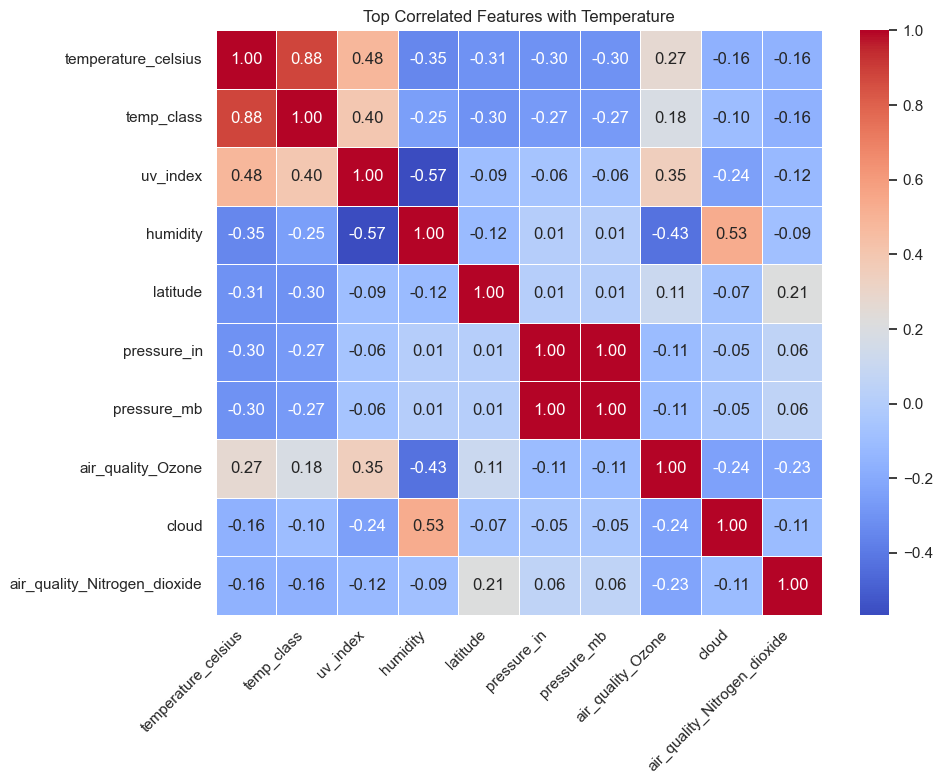

In [34]:
sns.set(style="whitegrid")

# A. Heatmap - Top Correlated Features
corr=df.corr(numeric_only=True)
top = corr["temperature_celsius"].abs().sort_values(ascending=False).head(10).index.tolist()

plt.figure(figsize=(10,8))
sns.heatmap(df[top].corr(),annot=True,cmap="coolwarm",fmt=".2f",linewidths=0.5)
plt.title("Top Correlated Features with Temperature")
plt.xticks(rotation=45,ha="right")
plt.tight_layout()
plt.show()

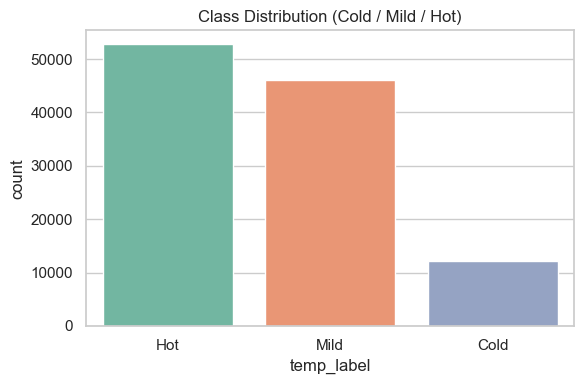

In [35]:
# A. Class Distribution Plot
plt.figure(figsize=(6,4))
sns.countplot(x="temp_label",data=df,hue="temp_label",palette="Set2",legend=False)
plt.title("Class Distribution (Cold / Mild / Hot)")
plt.tight_layout()
plt.show()


In [36]:
# 4. Feature Selection
num=df.select_dtypes(include=["int64","float64"]).columns.tolist()
for col in ["temperature_celsius","temp_class"]:
    if col in num: num.remove(col)

X=df[num]
y=df["temp_class"]


In [37]:
# 5. Train-Test Split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42,stratify=y)

# 6. Scaling
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)


In [38]:
# 7. Models (Simple List)
model_names=["Logistic Regression","Decision Tree","Random Forest","KNN","SVC"]
model_list=[
    LogisticRegression(max_iter=1000),
    DecisionTreeClassifier(random_state=42),
    RandomForestClassifier(n_estimators=100,random_state=42),
    KNeighborsClassifier(n_neighbors=5),
    SVC(kernel="rbf")
]

accuracies=[]; precisions=[]; recalls=[]; f1scores=[]


In [9]:
# 8. Loop Evaluation (Simple)
for i in range(len(model_list)):
    model=model_list[i]
    model.fit(X_train,y_train)
    pred=model.predict(X_test)

    acc=accuracy_score(y_test,pred)
    prec=precision_score(y_test,pred,average='weighted')
    rec=recall_score(y_test,pred,average='weighted')
    f1=f1_score(y_test,pred,average='weighted')

    accuracies.append(acc); precisions.append(prec); recalls.append(rec); f1scores.append(f1)

    print(f"\n{model_names[i]}")
    print("Accuracy :",acc)
    print("Precision:",prec)
    print("Recall   :",rec)
    print("F1 Score :",f1)



Logistic Regression
Accuracy : 0.7060149697898819
Precision: 0.7058292192148659
Recall   : 0.7060149697898819
F1 Score : 0.7045942719495574

Decision Tree
Accuracy : 0.8647308143204978
Precision: 0.8647999154791466
Recall   : 0.8647308143204978
F1 Score : 0.8647576652633103

Random Forest
Accuracy : 0.9093245558661737
Precision: 0.9096536314133801
Recall   : 0.9093245558661737
F1 Score : 0.9092737481447664

KNN
Accuracy : 0.8351519523852466
Precision: 0.8342256033275032
Recall   : 0.8351519523852466
F1 Score : 0.8345780053282339

SVC
Accuracy : 0.8403823608981874
Precision: 0.8396821073215027
Recall   : 0.8403823608981874
F1 Score : 0.8396447804710886


ValueError: shape mismatch: objects cannot be broadcast to a single shape.  Mismatch is between arg 0 with shape (5,) and arg 1 with shape (0,).

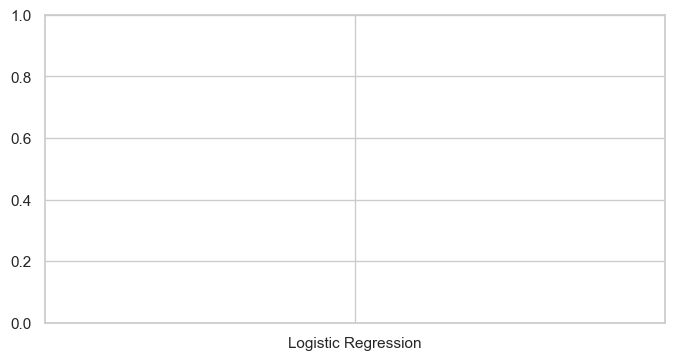

In [42]:
# B. Model Comparison - Accuracy
plt.figure(figsize=(8,4))
colors_acc = sns.color_palette("Blues", len(model_names))
plt.bar(model_names, accuracies, color=colors_acc)
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.ylim(0,1)
plt.tight_layout()
plt.show()

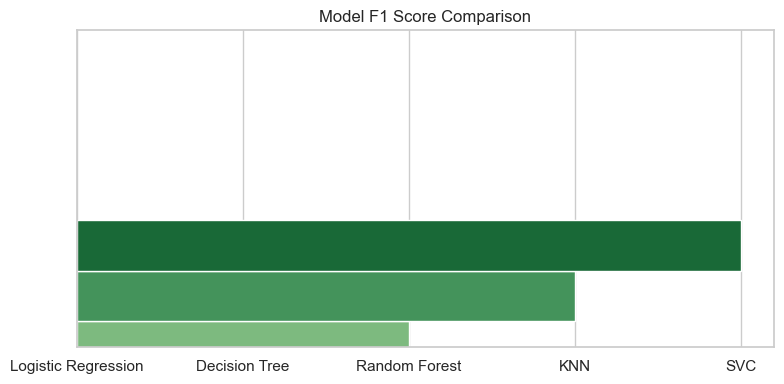

In [40]:
plt.figure(figsize=(8,4))
sns.barplot(x=model_names, y=f1scores, hue=model_names, palette="Greens", legend=False)
plt.title("Model F1 Score Comparison")
plt.ylim(0,1)
plt.tight_layout()
plt.show()